# Decision Tree Classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

## Importing the dataset

In [ ]:
df1 = pd.read_csv('Cleaned Train_Data.csv')
df2 = pd.read_csv('Cleaned Train_Labels.csv')
df3 = pd.read_csv('Cleaned_test_data.csv')
df4 = pd.read_csv('Cleaned_test_labels.csv')

In [ ]:
X_train = df1.iloc[:,:].values
y_train = df2.iloc[:,:].values
X_test =  df3.iloc[:,:].values
y_test =  df4.iloc[:,:].values

In [ ]:
y_train = y_train.flatten() 

In [ ]:
y_test = y_test.flatten() 

## Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9215  292]
 [ 129   16]]


0.9563820969747203

In [ ]:
# generate a no claim prediction (majority class)
default_probs = [0 for _ in range(len(y_test))]

#Probabilities of the predictions
dt_prob = classifier.predict_proba(X_test)

#We will use probabilities for the positive class only
dt_prob = dt_prob[:,1]

default_auc = roc_auc_score(y_test, default_probs)
dt_auc = roc_auc_score(y_test, dt_prob)

In [ ]:
# summarize scores
print('No Claim: ROC AUC=%.3f' % (default_auc))
print('Decision tree: ROC AUC=%.3f' % (dt_auc))

No Claim: ROC AUC=0.500
Decision tree: ROC AUC=0.554


In [ ]:
# calculate roc curves
default_fpr, default_tpr, _ = roc_curve(y_test, default_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, dt_prob)

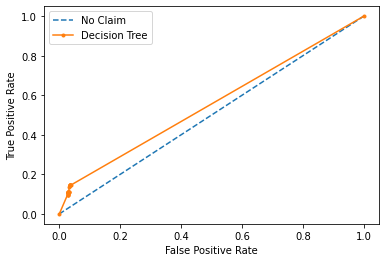

In [ ]:
# plot the roc curve for the model
plt.plot(default_fpr, default_tpr, linestyle='--', label='No Claim')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()